In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

This is a Simple explainer for how capital and contributions relate

Here is the summary of the prodecure
- a group of members pool capital
- and agree to collectively contribute labor to allocate that capital
- let the initial distribution of equity $s_0$ be determined by the capital contributed
  - each member has their own quantity of equity $s_0[i]$
  - if the total number of shares is $S_0 = \sum_i s_0[i]$
  - then denote each members initial equity share $x_0[i] = \frac{s_0[i]}{S_0}$
  - therefore $\sum x_0[i] = 1$
- supposed that for a given Season members contribute to managing the capital
- let the season 1 contributions scoring be based on some agreed upon policy
- at the close of season 1 there is a contribution vector $c_1$
  - each member has their own contribution value $c_1[i]$
  - the total quantity of contributions is $C_1 = \sum_i c_1[i]$
  - then denote each members contribution share $y_1[i] = \frac{c_1[i]}{C_1}$
  - therefore $\sum y_1[i] =1 $
- the membership reserves the right to vote to modify its equity allocation according rules other than pro-rata assignment of new shares.
- the membership wishes the equity allocation to "drift toward" the contribution vector (slowly)
- the membership agrees that the drift rate should be characterized by a parameter $\epsilon$
- at end of season 1 the following proposal having the following effect should be put forth and ratified
  - the vector direction shifts as $x_1 = (1-\epsilon)\cdot x_0 + \epsilon \cdot y_1$
  - by linearity, individuals experience $x_1[i] = (1-\epsilon)\cdot x_0[i] + \epsilon \cdot y_1[i]$

this is a simplified model to demonstrate the effects of the drift policy, while in practice, we expect
- members to be able to rage quit during the period of the proposal
- members who do ragequit to be subject to payout schedules and payout penalties

the drift mechanism can be composed with rules for adding adding removing capital, in a predictable way due to its simplicity.

In [2]:
n=10
#generate tailed distribution of initial equity
s = np.exp(10*np.random.random_sample(n))

In [3]:
#compute the total
S = sum(s)

(array([7., 0., 1., 1., 0., 0., 0., 0., 0., 1.]),
 array([1.05050593e+00, 1.33717695e+03, 2.67330339e+03, 4.00942983e+03,
        5.34555627e+03, 6.68168271e+03, 8.01780915e+03, 9.35393559e+03,
        1.06900620e+04, 1.20261885e+04, 1.33623149e+04]),
 <BarContainer object of 10 artists>)

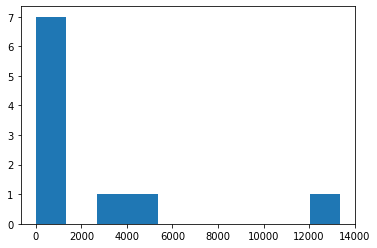

In [4]:
#histogram view
plt.hist(s)

In [5]:
#computer the fraction of the total each has
x = s/S

([<matplotlib.patches.Wedge at 0x7f8b702d2c20>,
 [Text(1.0999998438549088, 0.0005861050898981632, ''),
  Text(1.0999991410479346, 0.0013746613423689178, ''),
  Text(0.8612519626523427, 0.6842843391657358, ''),
  Text(0.24966351720303248, 1.0712927369201246, ''),
  Text(0.24889262526201458, 1.0714721000054936, ''),
  Text(0.1232697788196029, 1.0930711603686956, ''),
  Text(-0.46319405204049885, 0.9977230428101297, ''),
  Text(-0.8386151402298115, 0.7118459430082703, ''),
  Text(-0.8395073867835356, 0.7107934633463361, ''),
  Text(-0.37843345330689193, -1.0328543563437298, '')])

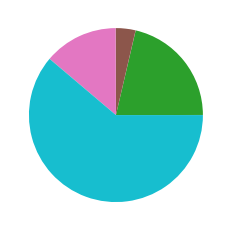

In [6]:
plt.pie(x)

In [7]:
#to make this clear lets assume all members repeated contribute equally during each season (yeah right)
c = np.ones(n)

In [8]:
c

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
y = c/sum(c)

([<matplotlib.patches.Wedge at 0x7f8b30b53df0>,
 [Text(1.0461621663333946, 0.3399186987098808, ''),
  Text(0.6465637650236904, 0.8899187028927925, ''),
  Text(-2.5747358111484753e-08, 1.0999999999999999, ''),
  Text(-0.6465638066837905, 0.8899186726249574, ''),
  Text(-1.0461621822461362, 0.3399186497354951, ''),
  Text(-1.0461621504206509, -0.33991874768426583, ''),
  Text(-0.6465637233635886, -0.8899187331606258, ''),
  Text(7.724207457870329e-08, -1.0999999999999974, ''),
  Text(0.6465638483438898, -0.88991864235712, ''),
  Text(1.0461621981588756, -0.33991860076110864, '')])

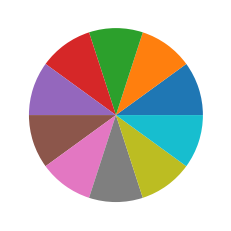

In [10]:
plt.pie(y)

In [17]:
#consider a drift rate of 200 basis point (2%) per season
eps = .02

#this is set on the higher side so we can see the impact of the policy

In [18]:
#consider 25 seasons of even contribution
T = 25

X = np.zeros((n,T+1))
X[:,0] = x

for t in range(1,T+1):
    X[:,t] = X[:,t-1]*(1-eps)+ y*eps  

In [19]:
df = pd.DataFrame(X.T, columns = ["Member"+str(i+1) for i in range(n)])

In [20]:
df

,Member1,Member2,Member3,Member4,Member5,Member6,Member7,Member8,Member9,Member10
0,0.000170,0.000059,0.213254,0.000154,0.000075,0.036831,0.137266,0.000351,0.000048,0.611792
1,0.002166,0.002057,0.210989,0.002151,0.002074,0.038094,0.136521,0.002344,0.002047,0.601556
2,0.004123,0.004016,0.208770,0.004108,0.004032,0.039332,0.135790,0.004297,0.004006,0.591525
3,0.006040,0.005936,0.206594,0.006026,0.005952,0.040546,0.135074,0.006211,0.005926,0.581695
4,0.007920,0.007817,0.204462,0.007905,0.007833,0.041735,0.134373,0.008087,0.007808,0.572061
5,0.009761,0.009661,0.202373,0.009747,0.009676,0.042900,0.133686,0.009925,0.009651,0.562620
6,0.011566,0.011468,0.200326,0.011552,0.011482,0.044042,0.133012,0.011727,0.011458,0.553367
7,0.013335,0.013238,0.198319,0.013321,0.013253,0.045161,0.132352,0.013492,0.013229,0.544300
8,0.015068,0.014974,0.196353,0.015055,0.014988,0.046258,0.131705,0.015222,0.014965,0.535414
9,0.016767,0.016674,0.194426,0.016754,0.016688,0.047333,0.131070,0.016918,0.016665,0.526706


In [21]:
#check that the row sums add up to 1
df.T.sum()

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
dtype: float64

<AxesSubplot:>

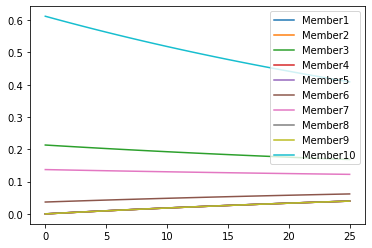

In [22]:
df.plot()

In [25]:
df.iloc[0].values

array([1.69602781e-04, 5.85839130e-05, 2.13254422e-01, 1.53882328e-04,
       7.51512204e-05, 3.68307314e-02, 1.37266025e-01, 3.51175843e-04,
       4.80973148e-05, 6.11792329e-01])

([<matplotlib.patches.Wedge at 0x7f8b413fefe0>,
 [Text(1.0999998438549088, 0.0005861050898981632, ''),
  Text(1.0999991410479346, 0.0013746613423689178, ''),
  Text(0.8612519626523427, 0.6842843391657358, ''),
  Text(0.24966351720303248, 1.0712927369201246, ''),
  Text(0.24889262526201458, 1.0714721000054936, ''),
  Text(0.1232697788196029, 1.0930711603686956, ''),
  Text(-0.46319405204049885, 0.9977230428101297, ''),
  Text(-0.8386151402298115, 0.7118459430082703, ''),
  Text(-0.8395073867835356, 0.7107934633463361, ''),
  Text(-0.37843345330689193, -1.0328543563437298, '')])

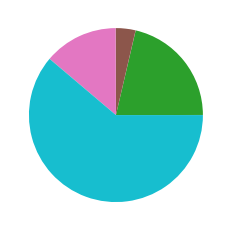

In [27]:
plt.pie(df.iloc[0].values)

([<matplotlib.patches.Wedge at 0x7f8b41488370>,
 [Text(1.0994828252241744, 0.033727096481432614, ''),
  Text(1.0953801491764623, 0.10070912962662115, ''),
  Text(0.7989801124239068, 0.7560626825542187, ''),
  Text(0.1606778355603916, 1.0882015590687362, ''),
  Text(0.09401930917960775, 1.0959746208290544, ''),
  Text(-0.08746246261239891, 1.096517358564731, ''),
  Text(-0.6519240219620374, 0.8859994749371137, ''),
  Text(-0.9730017253094966, 0.5130961338236171, ''),
  Text(-1.002698747217598, 0.4523220338743841, ''),
  Text(-0.21500511722633434, -1.078783017833749, '')])

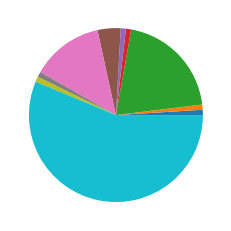

In [28]:
plt.pie(df.iloc[5].values)

([<matplotlib.patches.Wedge at 0x7f8b2060bc40>,
 [Text(1.0981564587351356, 0.06365840194590933, ''),
  Text(1.083499320439222, 0.18981365232180897, ''),
  Text(0.7375467960472177, 0.816103378035212, ''),
  Text(0.07928753413540021, 1.0971387728681947, ''),
  Text(-0.04770557918906001, 1.0989650484497842, ''),
  Text(-0.27539691235677394, 1.0649678589818359, ''),
  Text(-0.8004077507928156, 0.754551146358407, ''),
  Text(-1.0547799935179019, 0.31215247119696965, ''),
  Text(-1.0838126743186156, 0.18801618809647913, ''),
  Text(-0.06276233862431811, -1.0982080353240942, '')])

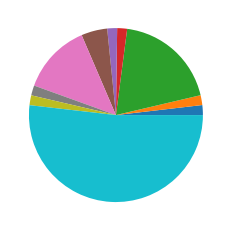

In [29]:
plt.pie(df.iloc[10].values)

([<matplotlib.patches.Wedge at 0x7f8b20745270>,
 [Text(1.0962564670623514, 0.09067391258775663, ''),
  Text(1.0665303121756569, 0.26928255274060375, ''),
  Text(0.6781347428382033, 0.8661023441578737, ''),
  Text(0.0053266763244184424, 1.099987102887727, ''),
  Text(-0.17519664807903948, 1.0859586246730901, ''),
  Text(-0.4383137058074105, 1.0089009343346724, ''),
  Text(-0.9123570146108086, 0.6144954661268486, ''),
  Text(-1.093452393461554, 0.11984099145617418, ''),
  Text(-1.0982740946329603, -0.06159556037696011, ''),
  Text(0.07598673068590435, -1.0973723236712634, '')])

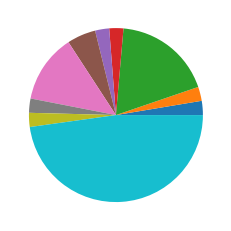

In [30]:
plt.pie(df.iloc[15].values)

([<matplotlib.patches.Wedge at 0x7f8b207ea7a0>,
 [Text(1.093967184424818, 0.11504694433854623, ''),
  Text(1.0461801343362924, 0.33986339391010806, ''),
  Text(0.6215145806130574, 0.9075900099083152, ''),
  Text(-0.06155810529975154, 1.098276194621328, ''),
  Text(-0.28843946585087726, 1.061509620559164, ''),
  Text(-0.5764297082990112, 0.9368718116104877, ''),
  Text(-0.9927610309630653, 0.4737357231634024, ''),
  Text(-1.098499032229925, -0.057444548826831324, ''),
  Text(-1.0624807663331843, -0.2848413965210282, ''),
  Text(0.20042521834770818, -1.0815866732954293, '')])

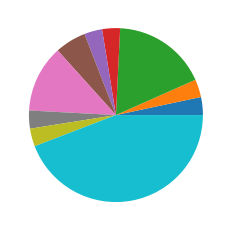

In [31]:
plt.pie(df.iloc[20].values)

([<matplotlib.patches.Wedge at 0x7f8ba0c8fe20>,
 [Text(1.0914315851271985, 0.13702954056235755, ''),
  Text(1.0237678174019427, 0.40236731484063504, ''),
  Text(0.5681501348857234, 0.941915826509638, ''),
  Text(-0.12182746422254541, 1.0932328521230528, ''),
  Text(-0.38808281855463483, 1.0292675677114724, ''),
  Text(-0.6914008902311606, 0.8555494193718787, ''),
  Text(-1.0469262754559612, 0.3375579561496204, ''),
  Text(-1.0784762944457569, -0.2165384084141878, ''),
  Text(-0.9914207421161949, -0.4765342716969826, ''),
  Text(0.31070906964110073, -1.0552060813143382, '')])

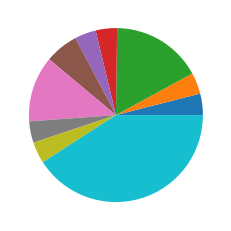

In [32]:
plt.pie(df.iloc[25].values)

the above demonstrates roughly how equity diffuses towards the contribution vector. Note that to understant this fully its worth running variations where the contribution vector is, lumpy, randomized with different distributions, and generally see how the process filters the noise of the contribution vector over time.

Its also possible to extend the model to include interactions with actions of addition of new capital as well as rage quits. Increasing the complexity of the model would merit shifting to a package (such as cadCAD) for repeated controlled experiments over multiple interacting mechanisms